# <u>Hierarchical Clustering</u>

# 1. Importing the Libraries

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Importing the Dataset

In [116]:
data_set = pd.read_csv('Mall_Customers.csv')
X = data_set.iloc[:, [3, 4]].values
# Y ?? When working with unsupervised learning we don't need the dependent variable

# 3. Using Dendrogram to find the optimal number of clusters

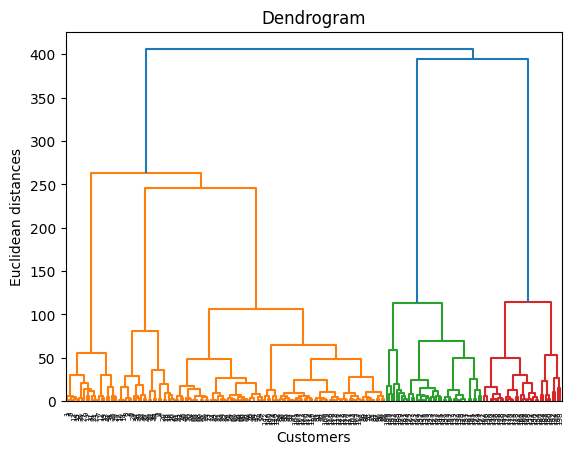

In [117]:
# The Dendrogram function will not be imported from Scikit Learn but rather from Scipy
# 1. Importing the Module and submodule that contain the dendrogram function
import scipy.cluster.hierarchy as sch

# 2. Creating the dendrogram
    # We call 1st the function 'sch' leading to the dendrogram from which we can call the 'dendrogram' function
        # We call 2nd the function 'sch' leading to the linkage function
            # linkage takes 2 Arguments
                # (1st: the matrix of features X) & (2nd: the linkage method i.e. Clustering technique) 
                    # The clustering technique or method that yield the most relevant result in HC is the method of minimum variance...
                    # ...that is the "ward" method.
                        # Ward will yield clusters inside which the observations points don't vary too much. i.e. Minimizing the variance...
                        # ... in each of the cluster resulting from HC.
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) 

# 3. Visualizing the dendrogram
plt.title('Dendrogram')

# X-Axis in the Dendrogram is the row i.e. The number of customers
plt.xlabel('Customers')

# Y-Axis is the Euclidean distances between the clusters
plt.ylabel('Euclidean distances')

plt.show() 

# How to determine the optimal number of cluster.
1. from one extended horizontal line to the next, Identify the longest vertical line in the dendrogram.
2. We move from the top of the longest vertical line and stop on the next extended horizontal line.
3. The number of optimal clusters is the of number of vertical bars within the vertical move.

$\to$ i did an error above, so the diagram below is incorrect but the approach is correct.

![alt text](<../Image/Screenshot 2025-07-15 213015.jpg>)

# Training the Hierarchical Clustering Model on the dataset

In [118]:
# 1. Import the AgglomerativeClustering class from Scikit Learn
from sklearn.cluster import AgglomerativeClustering

# 2. Creating/building the HC-Model object by calling the class
    # n_clusters is the number of clusters that we want to form, optimal number of clusters is '2'
        # we dn't need to specify the affinity method i.e. 'Euclidean distance' since the default for HC is 'Euclidean distance'
            # linkage is the linkage method, here we use the 'ward' method
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')

# 3. Training the HC-model
y_hc = hc.fit_predict(X)    # fit_predict will train the model and create the dependable variable for each of the clusters.
                            # Y_hc will store what is return by the fit_predict method.
                            # i.e. fitting the model to the dataset X and creating the dependent variable Y_hc

In [119]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visualizing the clusters

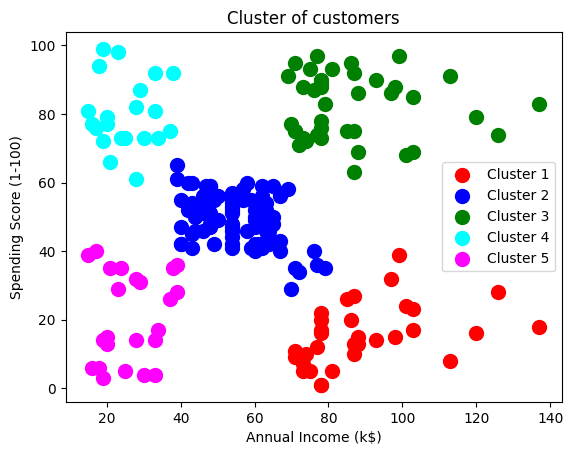

In [120]:
# 1. creating Scatter plots for each of the cluster.
    # - Here we will specify the x and y coordinate of the points, size, color(to distinguish the clusters) and label.
    #                  X                    Y     coordinate
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
        # For X coordinate:
              # Start by Calling the feature X since it contains the different customers.
              # index of the column after the comma and before the column all the customer that belongs to that cluster, by using the Y_kmeans to specify it...
              # ... i.e. Y_kmeans will select all the customers that belongs to that particular cluster.
              # i.e column of x coordinate correspond to the annual income and .
        
        # For Y coordinate:
              # Start by Calling the feature X since it contains the different customers.
              # index of the column after the comma and before the column all the customer that belongs to that cluster, by using the Y_kmeans to specify it...
              # ... i.e. Y_kmeans will select all the customers that belongs to that particular cluster.
              # For the column of y coordinate we call the index 1 since it correspond to the spending score.

        # i.e column of x coordinate correspond to the annual income and column of y coordinate correspond to the spending score.

plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
